### Домашнее задание

Домашнее задание

Практическое задание:

    взять любой набор данных для бинарной классификации (можно скачать один из модельных с https://archive.ics.uci.edu/ml/datasets.php)
    сделать обзорный анализ выбранного датасета
    сделать feature engineering
    обучить любой классификатор (какой вам нравится)
    разобраться с SHAP и построить важности признаков для:
        всего тестового набора данных (summary_plot - дать интерпретацию)
        для топ 10%
    для отдельных наблюдений вывести force_plot и попытаться проинтерпретировать результат



Dataset - https://www.kaggle.com/teejmahal20/airline-passenger-satisfaction
    
Content
1. Gender: Gender of the passengers (Female, Male)
2. Customer Type: The customer type (Loyal customer, disloyal customer)
3. Age: The actual age of the passengers
4. Type of Travel: Purpose of the flight of the passengers (Personal Travel, Business Travel)
5. Class: Travel class in the plane of the passengers (Business, Eco, Eco Plus)
6. Flight distance: The flight distance of this journey
7. Inflight wifi service: Satisfaction level of the inflight wifi service (0:Not Applicable;1-5)
8. Departure/Arrival time convenient: Satisfaction level of Departure/Arrival time convenient
9. Ease of Online booking: Satisfaction level of online booking
10. Gate location: Satisfaction level of Gate location
11. Food and drink: Satisfaction level of Food and drink
12. Online boarding: Satisfaction level of online boarding
13. Seat comfort: Satisfaction level of Seat comfort
14. Inflight entertainment: Satisfaction level of inflight entertainment
15. On-board service: Satisfaction level of On-board service
16. Leg room service: Satisfaction level of Leg room service
17. Baggage handling: Satisfaction level of baggage handling
18. Check-in service: Satisfaction level of Check-in service
19. Inflight service: Satisfaction level of inflight service
20. Cleanliness: Satisfaction level of Cleanliness
21. Departure Delay in Minutes: Minutes delayed when departure
22. Arrival Delay in Minutes: Minutes delayed when Arrival
23. Satisfaction: Airline satisfaction level(Satisfaction, neutral or dissatisfaction)    

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

%matplotlib inline

In [2]:
df = pd.read_csv('airlines_sattisfaction.csv')
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [3]:
df.columns

Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [4]:
df = df.drop(['Unnamed: 0'], axis=1)

In [5]:
df.head(1)

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied


##### сделать обзорный анализ выбранного датасета

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 103904 non-null  int64  
 1   Gender                             103904 non-null  object 
 2   Customer Type                      103904 non-null  object 
 3   Age                                103904 non-null  int64  
 4   Type of Travel                     103904 non-null  object 
 5   Class                              103904 non-null  object 
 6   Flight Distance                    103904 non-null  int64  
 7   Inflight wifi service              103904 non-null  int64  
 8   Departure/Arrival time convenient  103904 non-null  int64  
 9   Ease of Online booking             103904 non-null  int64  
 10  Gate location                      103904 non-null  int64  
 11  Food and drink                     1039

In [7]:
# Null check
df.isnull().sum()

id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64

In [8]:
df['Arrival Delay in Minutes'].describe().T

count    103594.000000
mean         15.178678
std          38.698682
min           0.000000
25%           0.000000
50%           0.000000
75%          13.000000
max        1584.000000
Name: Arrival Delay in Minutes, dtype: float64

In [9]:
df['Arrival Delay in Minutes'] = df['Arrival Delay in Minutes'].fillna(round(df['Arrival Delay in Minutes'].mean()))

In [10]:
df['Arrival Delay in Minutes'].isnull().sum()

0

In [11]:
df = df.set_index('id')

In [12]:
df.columns

Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [13]:
categorical_features = ['Gender', 'Customer Type', 'Type of Travel', 'Class']

continous_features = ['Age',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']

target = 'satisfaction'

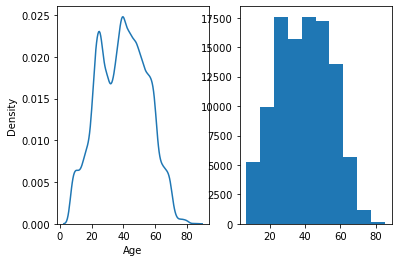

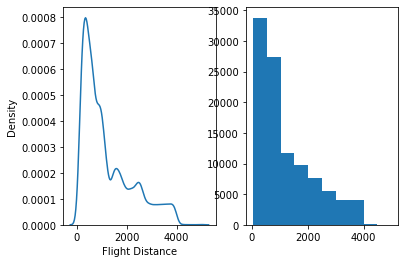

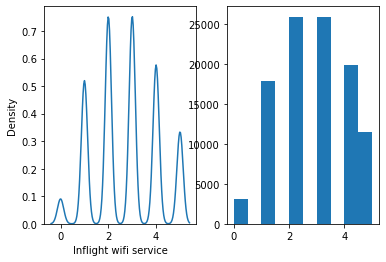

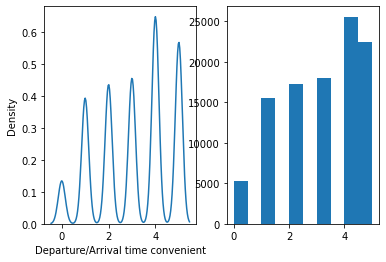

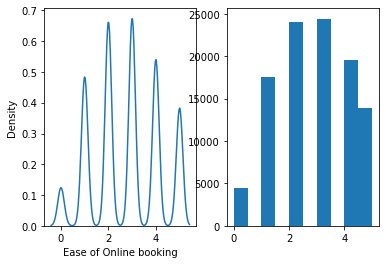

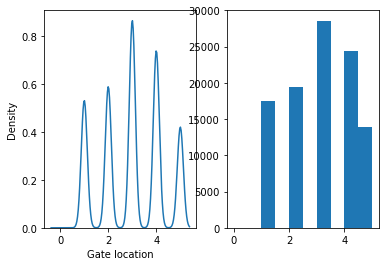

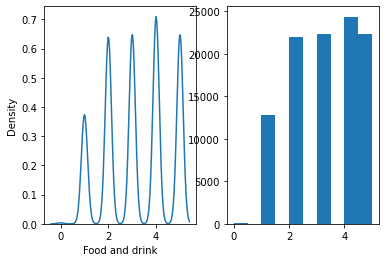

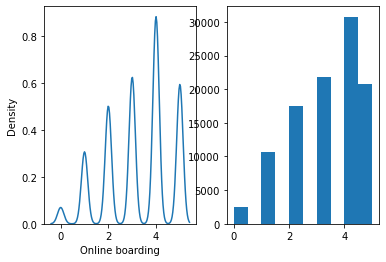

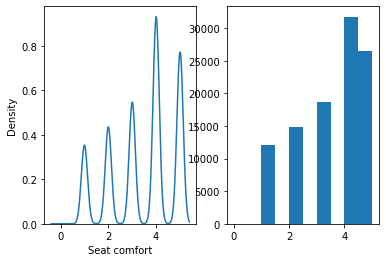

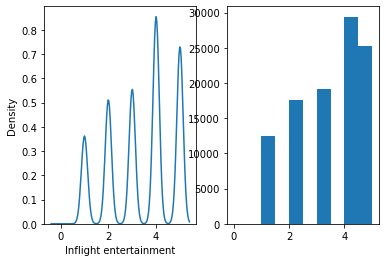

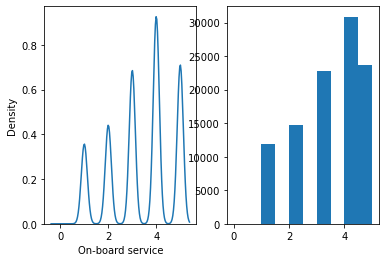

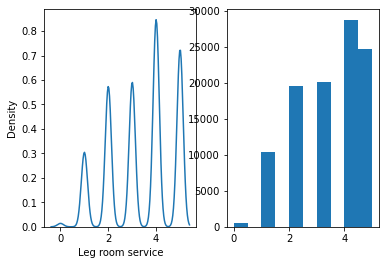

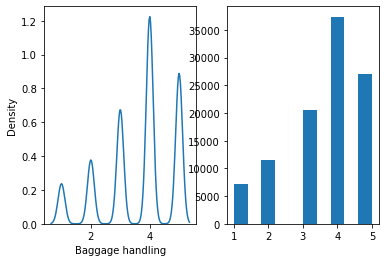

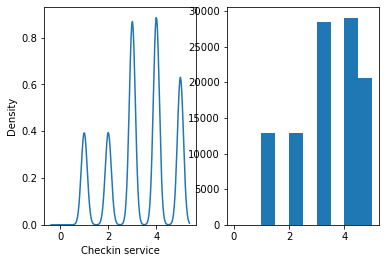

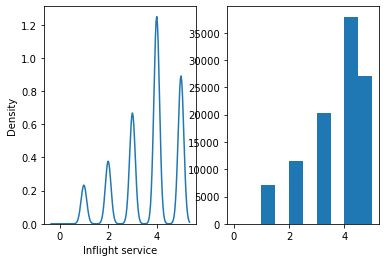

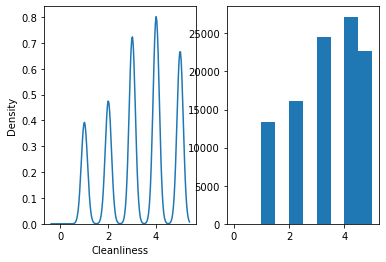

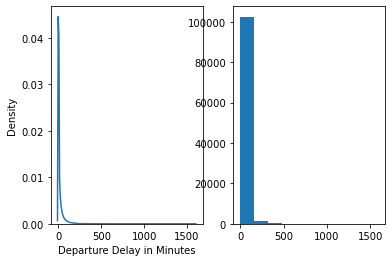

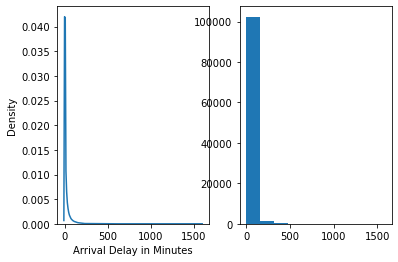

In [14]:
for name in continous_features:
  plt.subplot(1,2,1)
  sns.kdeplot(df[name])
  plt.subplot(1,2,2)
  plt.hist(df[name])
  plt.show()

##### Обработаем flight distance

In [15]:
from sklearn.preprocessing import QuantileTransformer

qt = QuantileTransformer(output_distribution='normal')

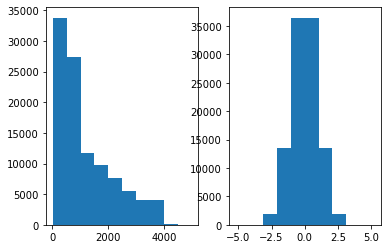

In [17]:
fd = qt.fit_transform(df['Flight Distance'].values.reshape(-1,1))
plt.subplot(1,2,1)
plt.hist(df['Flight Distance'])
plt.subplot(1,2,2)
plt.hist(fd)
plt.show()

In [18]:
df['Flight Distance'] = fd

##### Departure and Arrival Delays

In [19]:
from sklearn.preprocessing import KBinsDiscretizer

/home/dreamwall/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_discretization.py:200: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn('Bins whose width are too small (i.e., <= '


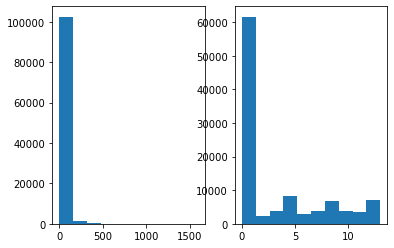

In [20]:
dep_bins = KBinsDiscretizer(n_bins=30, encode='ordinal').fit_transform(df['Departure Delay in Minutes'].values.reshape(-1,1))
plt.subplot(1,2,1)
plt.hist(df['Departure Delay in Minutes'])
plt.subplot(1,2,2)
plt.hist(dep_bins)
plt.show()

/home/dreamwall/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_discretization.py:200: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn('Bins whose width are too small (i.e., <= '


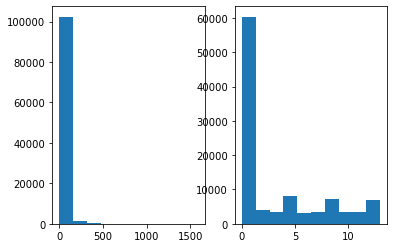

In [21]:
arr_bins = KBinsDiscretizer(n_bins=30, encode='ordinal').fit_transform(df['Arrival Delay in Minutes'].values.reshape(-1,1))
plt.subplot(1,2,1)
plt.hist(df['Arrival Delay in Minutes'])
plt.subplot(1,2,2)
plt.hist(arr_bins)
plt.show()

In [22]:
df['Departure Delay in Minutes'] = dep_bins
df['Arrival Delay in Minutes'] = arr_bins

##### Target

In [23]:
df[target].unique()

array(['neutral or dissatisfied', 'satisfied'], dtype=object)

In [24]:
df[target] = df[target].map({'neutral or dissatisfied': 0, 'satisfied': 1})

##### Обучим классификатор

In [25]:
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
from catboost import CatBoostClassifier


In [26]:
import warnings
warnings.filterwarnings('ignore')

In [27]:
class FeatureSelector(BaseEstimator, TransformerMixin):
    def __init__(self, column):
        self.column = column

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        return X[self.column]
    
class NumberSelector(BaseEstimator, TransformerMixin):
    """
    Transformer to select a single column from the data frame to perform additional transformations on
    Use on numeric columns in the data
    """
    def __init__(self, key):
        self.key = key

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X[[self.key]]
    
class OHEEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, key):
        self.key = key
        self.columns = []

    def fit(self, X, y=None):
        self.columns = [col for col in pd.get_dummies(X, prefix=self.key).columns]
        return self

    def transform(self, X):
        X = pd.get_dummies(X, prefix=self.key)
        test_columns = [col for col in X.columns]
        for col_ in self.columns:
            if col_ not in test_columns:
                X[col_] = 0
        return X[self.columns]


In [28]:
final_transformers = list()

for cat_col in categorical_features:
    cat_transformer = Pipeline([
                ('selector', FeatureSelector(column=cat_col)),
                ('ohe', OHEEncoder(key=cat_col))
            ])
    final_transformers.append((cat_col, cat_transformer))
    
for cont_col in continous_features:
    cont_transformer = Pipeline([
                ('selector', NumberSelector(key=cont_col)),
                ('scaler', StandardScaler(cont_col)) 
            ])
    final_transformers.append((cont_col, cont_transformer))



In [29]:
features = FeatureUnion(final_transformers)

feature_processing = Pipeline([('feats', features)])

In [30]:
fs = categorical_features + continous_features

In [31]:
X_train, X_test, y_train, y_test = train_test_split(df[fs], df[target], random_state=0)

In [32]:
pipeline = Pipeline([
    ('features',features),
    ('classifier', CatBoostClassifier(random_state=42, silent=True)),
])

In [33]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('features',
                 FeatureUnion(transformer_list=[('Gender',
                                                 Pipeline(steps=[('selector',
                                                                  FeatureSelector(column='Gender')),
                                                                 ('ohe',
                                                                  OHEEncoder(key='Gender'))])),
                                                ('Customer Type',
                                                 Pipeline(steps=[('selector',
                                                                  FeatureSelector(column='Customer '
                                                                                         'Type')),
                                                                 ('ohe',
                                                                  OHEEncoder(key='Customer '
                                                      

In [34]:
preds = pipeline.predict_proba(X_test)[:, 1]
preds[:10]

array([9.99090588e-01, 1.15429741e-04, 1.92175415e-05, 1.37913495e-05,
       9.99918318e-01, 2.46786275e-05, 9.99997541e-01, 8.41799045e-01,
       9.68688593e-01, 9.99998921e-01])

In [35]:
from sklearn.metrics import (f1_score,
                            roc_auc_score,
                            precision_score,
                            classification_report,
                            precision_recall_curve,
                            confusion_matrix)

In [36]:
precision, recall, thresholds = precision_recall_curve(y_test, preds)

fscore = (2 * precision * recall) / (precision + recall)
# locate the index of the largest f score
ix = np.argmax(fscore)
print('Best Threshold=%f, F-Score=%.3f, Precision=%.3f, Recall=%.3f' % (thresholds[ix], 
                                                                        fscore[ix],
                                                                        precision[ix],
                                                                        recall[ix]))

Best Threshold=0.543683, F-Score=0.959, Precision=0.974, Recall=0.943


##### разобраться с SHAP и построить важности признаков для:
    1. всего тестового набора данных (summary_plot - дать интерпретацию)
    2. для топ 10%
##### для отдельных наблюдений вывести force_plot и попытаться проинтерпретировать результат

In [37]:
import shap
shap.initjs()

In [38]:
!pip install shap

  Using cached slicer-0.0.3-py3-none-any.whl (11 kB)
  Attempting uninstall: slicer
    Found existing installation: slicer 0.0.7
ERROR: Could not install packages due to an EnvironmentError: [Errno 2] No such file or directory: '/home/dreamwall/anaconda3/lib/python3.8/site-packages/slicer-0.0.7.dist-info/RECORD'



In [39]:
?shap

In [40]:
model = CatBoostClassifier()

In [41]:
model.fit(X_train,
          y_train,
          cat_features=categorical_features,
          verbose=False)

In [42]:
# строим модель объЯсненияе в SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn and spark models)
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_train)

# покажем объяснение первого примера (берем matplotlib=True для обхода Javascript)
shap.initjs() # для работы в колаборатории 
shap.force_plot(explainer.expected_value, shap_values[0,:], X_train.iloc[0,:])

In [43]:
shap_values

array([[-6.89877336e-03,  2.55485932e-01, -2.19931980e+00, ...,
        -2.56796863e-01, -1.42870724e-02,  2.91504698e-01],
       [-2.43058335e-02,  1.11947049e+00,  3.06251852e+00, ...,
        -1.99891007e-01, -1.73810491e-02,  2.06722278e-01],
       [-2.67040632e-02,  2.87394766e-01, -2.51197880e+00, ...,
         7.95482399e-02, -6.03013338e-02,  2.89368003e-01],
       ...,
       [-2.55391667e-02,  7.07269344e-02, -2.41919914e+00, ...,
         1.58444377e-01,  2.72408762e-02,  2.55231182e-01],
       [-3.46828698e-02,  4.83091136e-01, -6.65692790e+00, ...,
         4.22973294e-01, -4.23022335e-02,  2.74554282e-01],
       [ 5.80606829e-03,  6.05000205e-01, -4.31328908e+00, ...,
        -1.84287759e-01,  1.45042663e-02,  2.54367556e-01]])

In [44]:
explainer

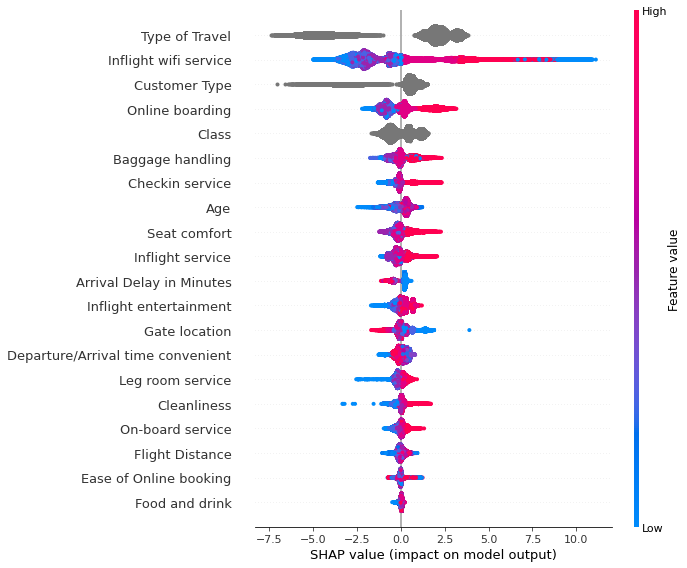

In [45]:
shap.summary_plot(shap_values, X_train)

##### Вывод
Более довольны своим полетом пассажиры, воспользовавшиеся WiFi, зарегистрировавшиеся онлайн и оставшиеся довольными "стойкой" регистрации, обращением с багажом, комфортом кресел и услугами во время полета.

##### Вопрос
Не понятно, как интерпретировать категориальные признаки? То есть, по графику видно, что они оказали большое влияние на решение модели, но как понять, какой например "Customer Type" чаще удовлетворен?

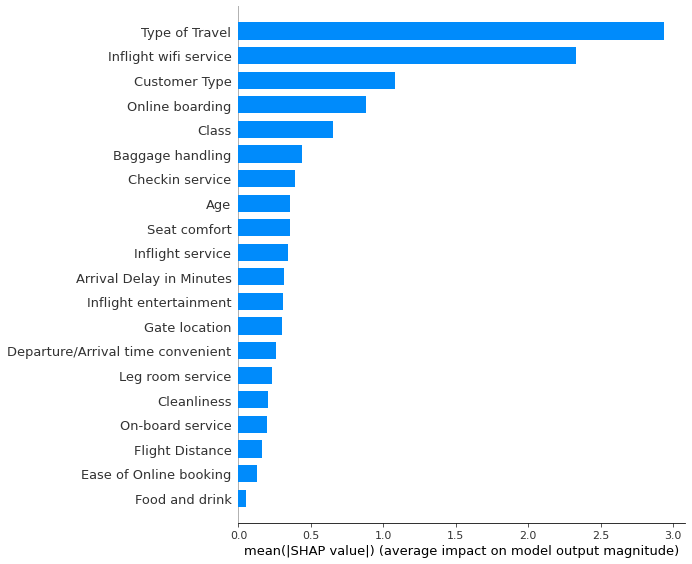

In [46]:
shap.summary_plot(shap_values, X_train, plot_type="bar")

##### 10%

In [57]:
n = round(len(shap_values) * 0.1)

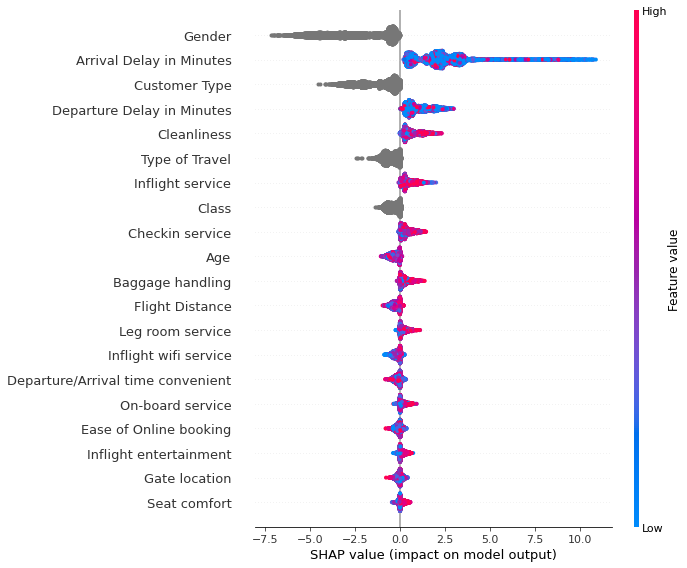

In [58]:
shap.summary_plot(np.sort(shap_values[:n,:]), X_train.iloc[:n,:])

##### Вывод
Для топ 10% наиболее важными факторами были: Минимальная задержка прилета в пункт назначения,
минимальная задержка отправления, а так же чистота и хороший сервич во время полета.

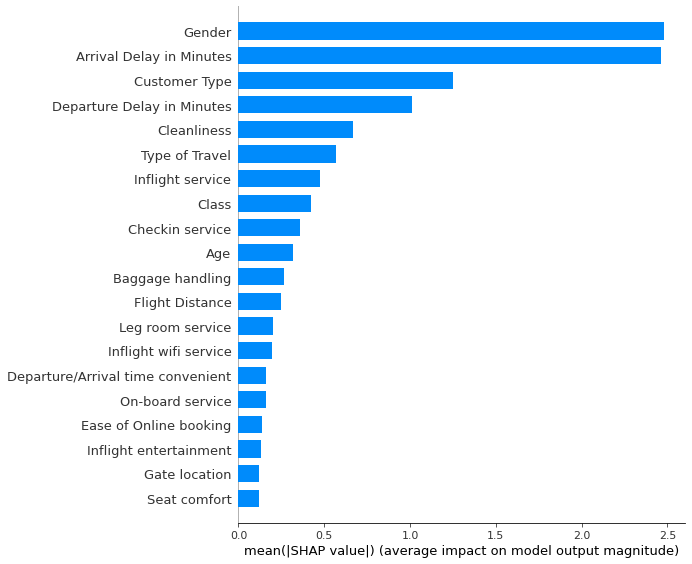

In [59]:
shap.summary_plot(np.sort(shap_values[:n,:]), X_train.iloc[:n,:], plot_type="bar")

In [62]:
n = 50
shap.initjs() 
shap.force_plot(explainer.expected_value, shap_values[:n,:], X_train.iloc[:n,:])

##### Наблюдение 42

In [63]:
shap.initjs() 
shap.force_plot(explainer.expected_value, shap_values[42], X_train.iloc[42])

Данный пассажир либо не доволен, либо остался нейтрален (0 в df). 
Этот пассажир не часто пользуется услугами этой компании или не является участником программы лояльности, средне оценивший чистоту, сервис в полете и сервис онлайн регистрации. эти параметры оказали большее значение на его оценку полета.

##### Наблюдение 4242

In [67]:
shap.initjs() 
shap.force_plot(explainer.expected_value, shap_values[4242], X_train.iloc[4242])

Данный посажир остался доволен полетом. Этот пассажир, летел бизнес классом, так же он является "преданным" клиентом, либо участником программы лояльности. Высоко оценил онлайн регистрацию, обращение с багажом.
Однако, ему "не понравился" WiFi